#                             PREDICTING EMPLOYEE CHURN USING                                                      RANDOM FOREST CLASSIFERS AND DECISION TREES

# IMPORTING LIBRARIES AND REQUIRED DATA

In [1]:
from __future__ import print_function
import pandas as pd
%matplotlib inline 
import os 
import warnings
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as image
plt.style.use('ggplot')
warnings.simplefilter('ignore')
import pandas_profiling

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv("C:/Users/Palla Anuraag Sharma/Downloads/Datacamp/Datasets/Employee Turnover Dataset/employee_data.csv")

# EXPLORATORY DATA ANALYSIS


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
pandas_profiling.ProfileReport(df)

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


Text(0, 0.5, 'No. of Employees')

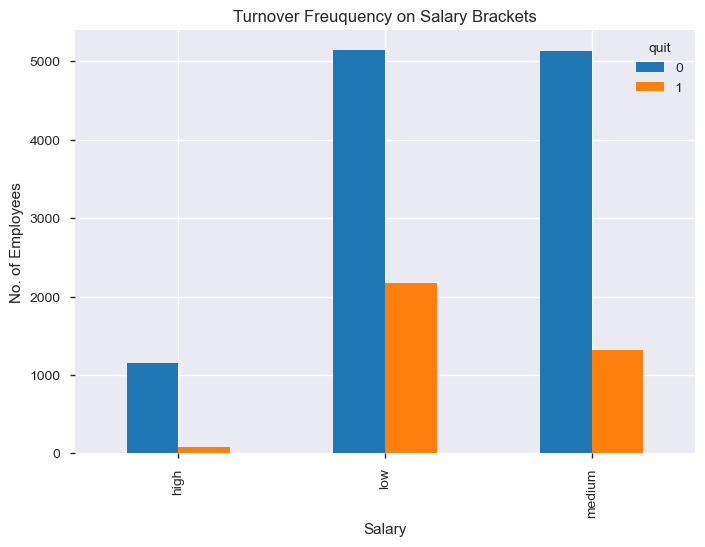

In [6]:
pd.crosstab(df.salary,df.quit).plot(kind='bar')
plt.title('Turnover Freuquency on Salary Brackets')
plt.xlabel('Salary')
plt.ylabel('No. of Employees')

Text(0, 0.5, 'No. of Employees')

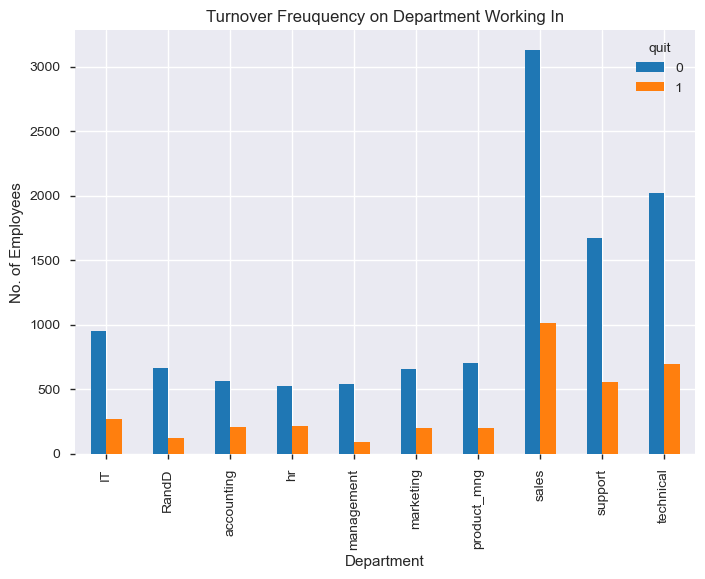

In [7]:
pd.crosstab(df.department,df.quit).plot(kind='bar')
plt.title('Turnover Freuquency on Department Working In')
plt.xlabel('Department')
plt.ylabel('No. of Employees')

# ENCODING CATEGORICAL FEATURES

In [8]:
cat_vars = ['department','salary']
for a in cat_vars:
    cat_list= pd.get_dummies(df[a],prefix=a)
    df = df.join(cat_list)

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [10]:
df.drop(columns=['department','salary'],axis=1,inplace=True)

# VISUALISE CLASS IMBALANCE

In [11]:
from yellowbrick.target import ClassBalance
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

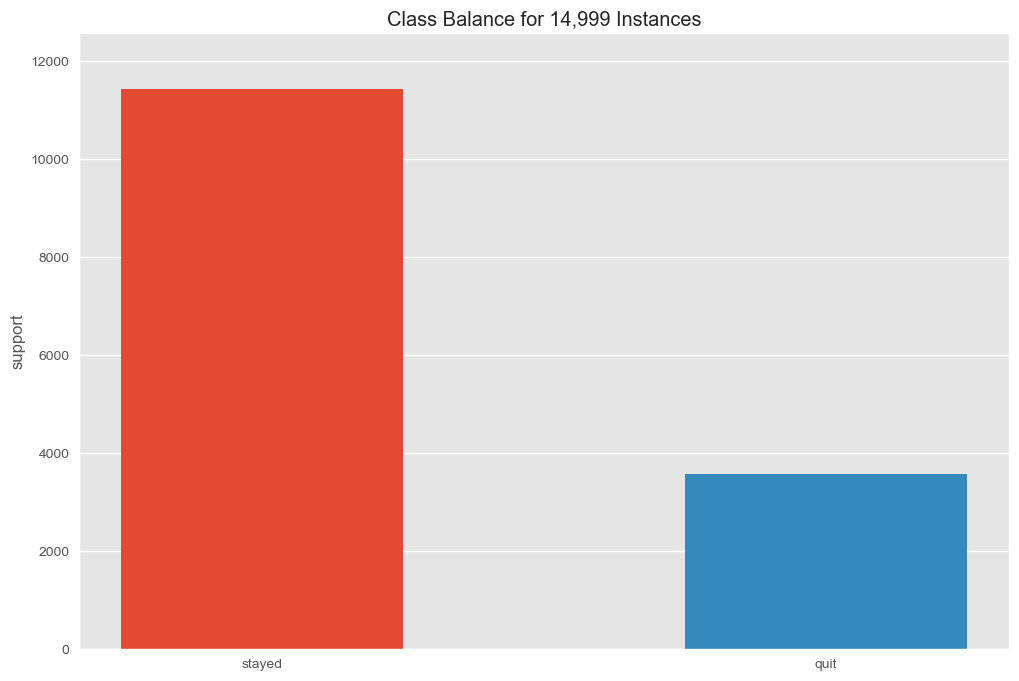

In [12]:
visualizer = ClassBalance(labels=['stayed','quit']).fit(df.quit)
visualizer.show()

In [13]:
## From this visualization we can say that there is class imbalance because more employees stayed in the company compared to those who quit

# CREATING TRAINING AND TESTING SETS

In [14]:
X = df.loc[:,df.columns != 'quit']
y = df.quit

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2,stratify=y)

# CREATING DECISION TREE CLASSIFIER USING SKLEARN LIBRARY

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import display
from ipywidgets import interactive,IntSlider,FloatSlider,interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg
from graphviz import Source

In [39]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2,continuous_update=False),
              min_split=IntSlider(min=1,max=5,value=2,continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1,continuous_update=False)):
    
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion= crit,
                                       splitter=split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    
    
    estimator.fit(X_train,y_train)
    
    
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    
    graph = Source(tree.export_graphviz(estimator, out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed','quit'],
                                       filled=True))  
         
          
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# BUILDING AN INTERACTIVE RANDOM FOREST CLASSIFIER

In [40]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=2,continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=1,max=5,value=2,continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1,continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                      criterion=crit,
                                      bootstrap=bootstrap,
                                      n_estimators=forests,
                                      max_depth=depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf=min_leaf,
                                      n_jobs=-1,
                                      verbose=False)
    estimator.fit(X_train,y_train)
    
    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('Visualizing Tree:',0)
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['stayed','quit'],
                                        filled=True))  
         
          
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# FEATURE IMPORTANCE AND EVALUATION METRICS

In [35]:
from yellowbrick.model_selection import FeatureImportances

In [37]:
plt.rcParams['figure.figsize'] = (12,8)

In [38]:
plt.style.use('ggplot')

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB4753CB88>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

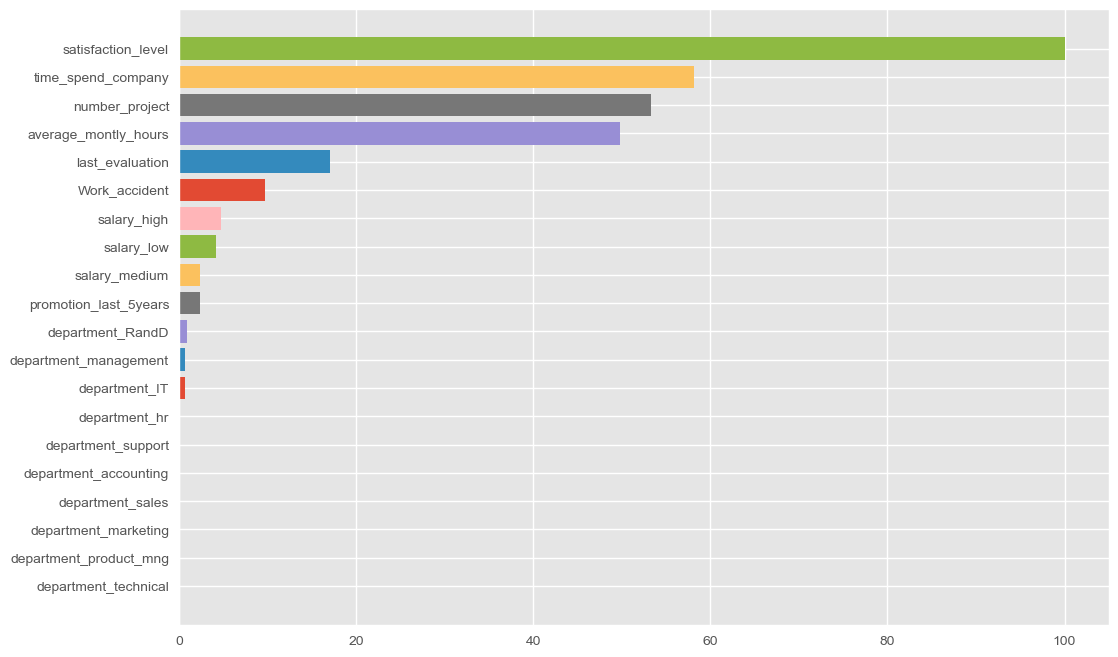

In [41]:
rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       verbose=False, warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train,y_train)

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB479BB108>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

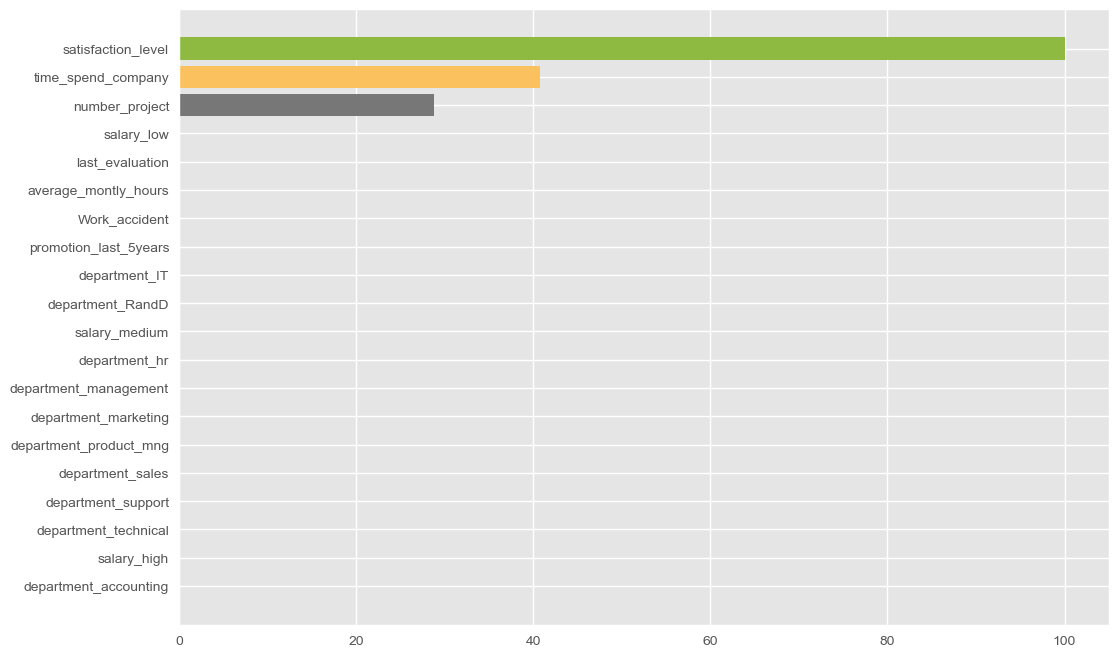

In [42]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
viz = FeatureImportances(dt)
viz.fit(X_train,y_train)

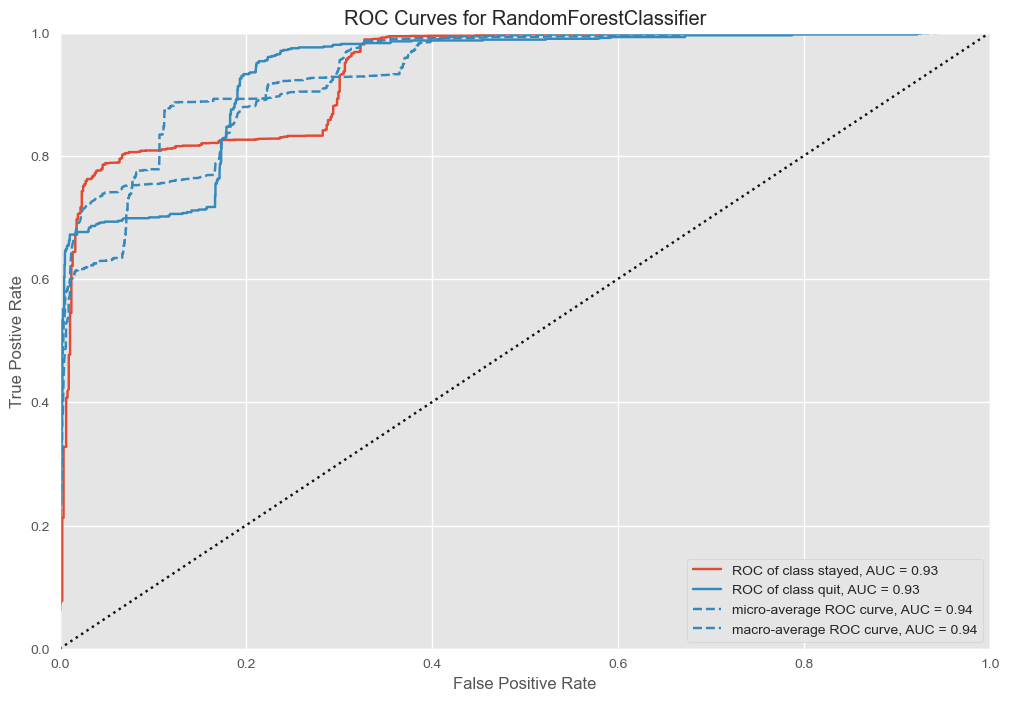

In [46]:
from yellowbrick.classifier import ROCAUC

Visualizer = ROCAUC(rf, classes=['stayed','quit'])
Visualizer.fit(X_train,y_train)
Visualizer.score(X_test,y_test)
Visualizer.show()